In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



**Task 4.1 Supervised Learning - Regression**

In [26]:
df = pd.read_csv('heartdata.csv')

In [27]:
print("First five rows of dataset:")
print(df.head())

First five rows of dataset:
   Unnamed: 0     biking    smoking  heartdisease
0           1  30.801246  10.896608     11.769423
1           2  65.129215   2.219563      2.854081
2           3   1.959665  17.588331     17.177803
3           4  44.800196   2.802559      6.816647
4           5  69.428454  15.974505      4.062224


Python - YOUR turn in the breakout room
·  Load dataset (heartdata.csv)
Use pandas.read_csv()
·  Check assumptions of a linear regression model, see also Linear Regression Tutorial
Use df.corr() and scipy.stats.pearsonr() for correlation tests
Use matplotlib.pyplot.hist() for histogram plots
Use seaborn.pairplot() or matplotlib.pyplot.scatter() for visualizing relationships
·  Fit a linear regression model
Use LinearRegression from sklearn.linear_model
Fit the model using .fit(X, y)
·  Evaluate the model
Use .coef_ and .intercept_ to extract coefficients
Use sklearn.metrics.r2_score() for model performance
Use matplotlib.pyplot.scatter() to visualize predictions
·  Train the model using cross-validation
Use train_test_split from sklearn.model_selection
Fit model on training data and evaluate on test data
·  Update Git repository
Run git add ., git commit -m "Linear Regression Analysis", git push in the terminal

**Check assuptions of a linear regression model**

In [28]:
print("\nCorrelation matrix:")
print(df.corr())


Correlation matrix:
              Unnamed: 0    biking   smoking  heartdisease
Unnamed: 0      1.000000  0.057088  0.052674     -0.051725
biking          0.057088  1.000000  0.015136     -0.935455
smoking         0.052674  0.015136  1.000000      0.309131
heartdisease   -0.051725 -0.935455  0.309131      1.000000


**Pairwise Pearson correlation for each numerical variable**

In [29]:
print("\nPairwise Pearson correlation coefficients (with p-values):")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'heartdisease':
        corr, pval = pearsonr(df[col], df['heartdisease'])
        print(f"Correlation between heartdisease and {col}: {corr:.3f} (p-value: {pval:.4f})")




Pairwise Pearson correlation coefficients (with p-values):
Correlation between heartdisease and Unnamed: 0: -0.052 (p-value: 0.2493)
Correlation between heartdisease and biking: -0.935 (p-value: 0.0000)
Correlation between heartdisease and smoking: 0.309 (p-value: 0.0000)


**Plot histograms**

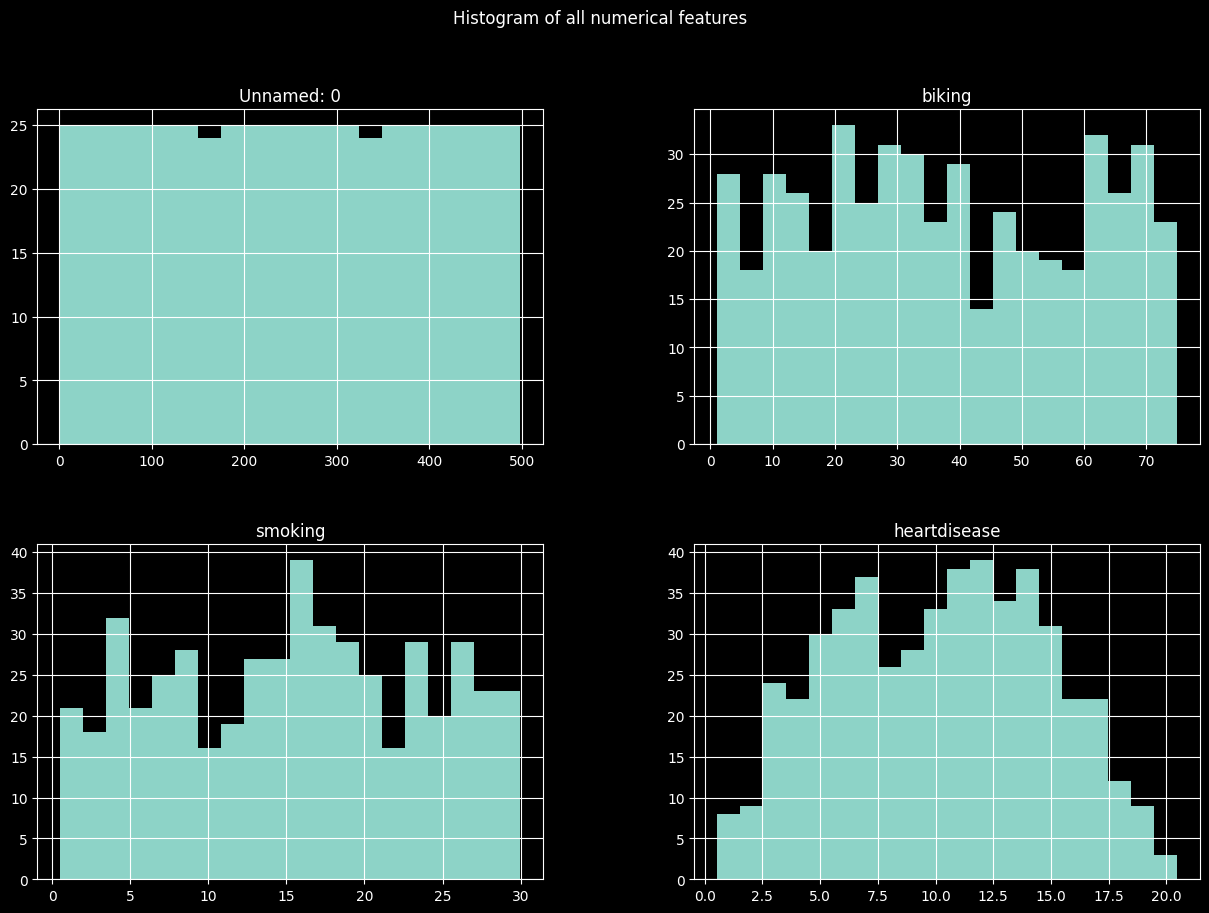

In [30]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of all numerical features")
plt.show()

**Scatter plots using seaborn pairplot**

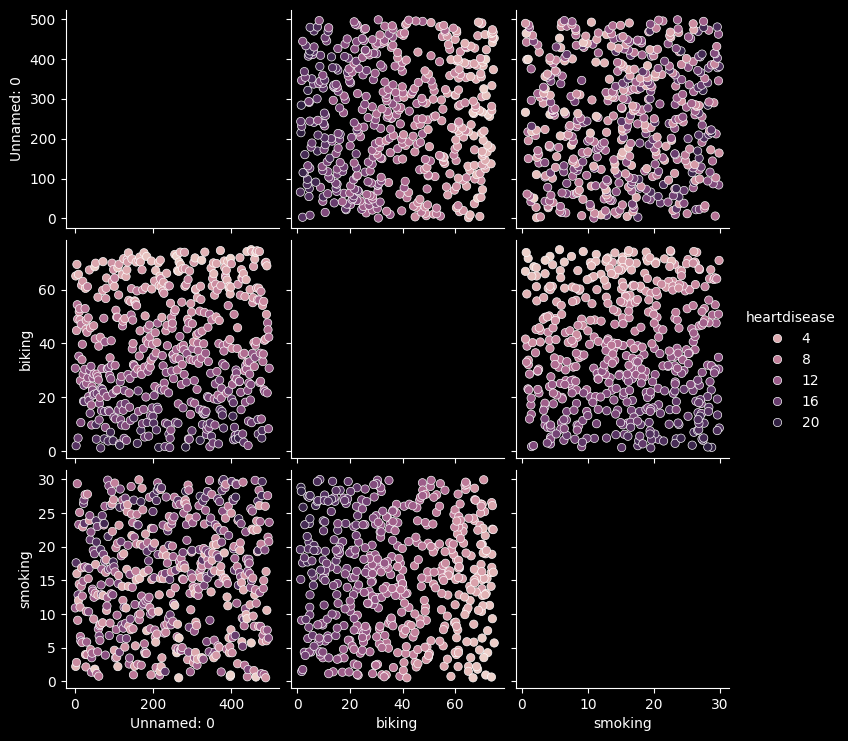

In [31]:
sns.pairplot(df, vars=[col for col in df.columns if col != 'heartdisease'], hue='heartdisease')
plt.show()

**Fit a linear regression model**

In [32]:
X = df.drop('heartdisease', axis=1)
y = df['heartdisease']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

**Evaluate the model**

In [33]:
print("\nModel coefficients:")
print(model.coef_)
print("Model intercept:")
print(model.intercept_)

y_pred = model.predict(X)
print("\nR^2 score on entire dataset:")
print(r2_score(y, y_pred))


Model coefficients:
[-0.00048182 -0.19995132  0.17876734]
Model intercept:
15.091314524288894

R^2 score on entire dataset:
0.9798460851683253


**Plot predictions vs actual**

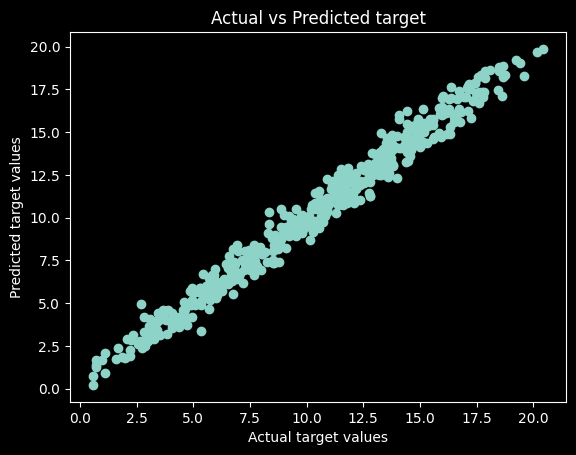

In [34]:
plt.scatter(y, y_pred)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title("Actual vs Predicted target")
plt.show()

**Train the model using cross-validation (train-test split)**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_cv = LinearRegression()
model_cv.fit(X_train, y_train)

y_test_pred = model_cv.predict(X_test)

print("\nR^2 score on test set (cross-validation):")
print(r2_score(y_test, y_test_pred))


R^2 score on test set (cross-validation):
0.9750262916244133


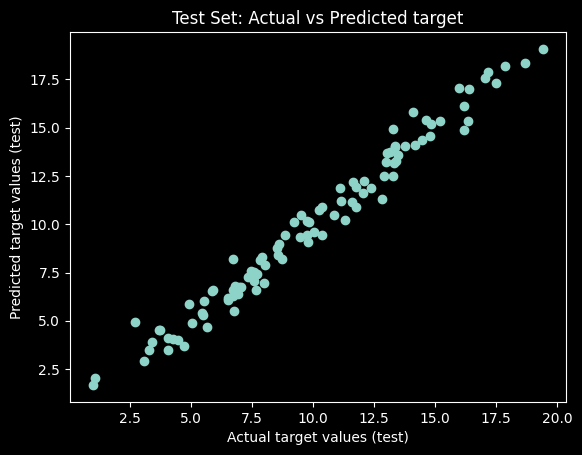

In [36]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual target values (test)")
plt.ylabel("Predicted target values (test)")
plt.title("Test Set: Actual vs Predicted target")
plt.show()